# Kernel Density Estimate  

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Stats.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Statistical plots.
import seaborn as sns

In [2]:
# Change the plot style.
plt.style.use('fivethirtyeight')

# Change default plot size.
plt.rcParams["figure.figsize"] = (18, 10)

<br>

### PDF : Probability Density Function  

***

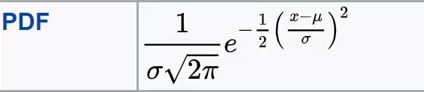

In [3]:
# Normal distribution.
def normalpdf(x, mu=0.0, sigma=1.0):
    """Calculates the PDF of a normal distrubtion."""
    # no.e = 2.71828
    # np.exp = e to the power of x
    numer = np.exp(-0.5 * np.square((x - mu) / sigma))
    denom = sigma * np.sqrt(2.0 * np.pi)
    return (numer / denom)

In [4]:
# Test value.
normalpdf(0.0)

0.3989422804014327

In [5]:
# Test value.
normalpdf(10.0)

7.69459862670642e-23

In [7]:
# Test values.
normalpdf(np.array([-1.0, 0.0, 1.0]))

array([0.24197072, 0.39894228, 0.24197072])

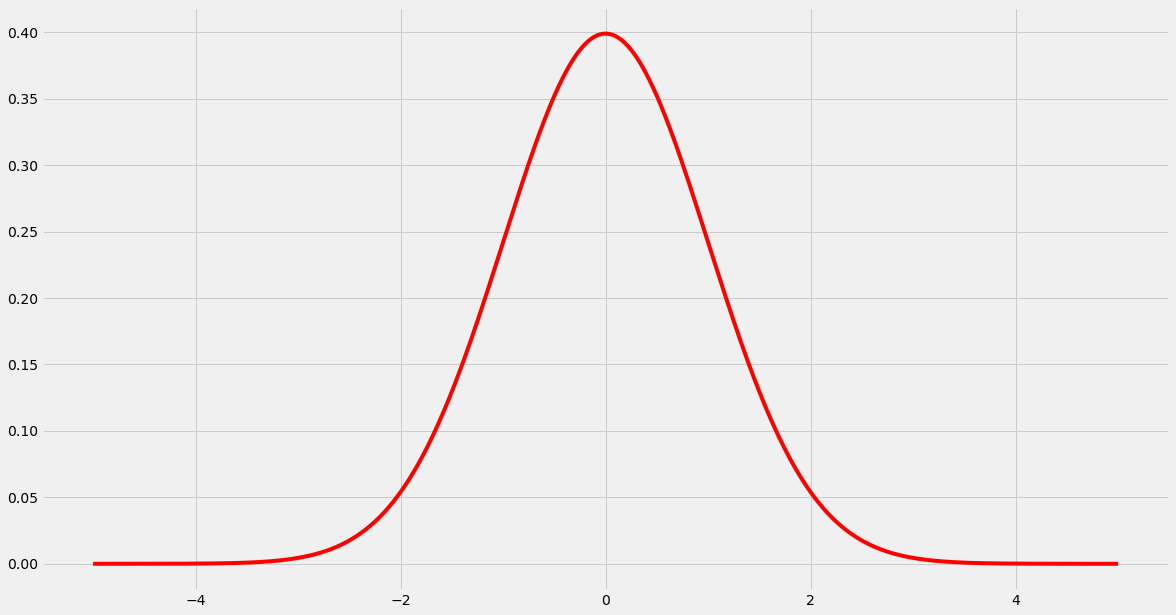

In [10]:
# Create some x values.
# lower limit, upper limit and how many points to chop into 
x = np.linspace(-5.0, 5.0, 1000)

# Calculate our y values from x.
y = normalpdf(x)

# Create a plot.
# subplots() = single supplot
fig, ax = plt.subplots()

# Plot the values.
ax.plot(x, y, 'r-')

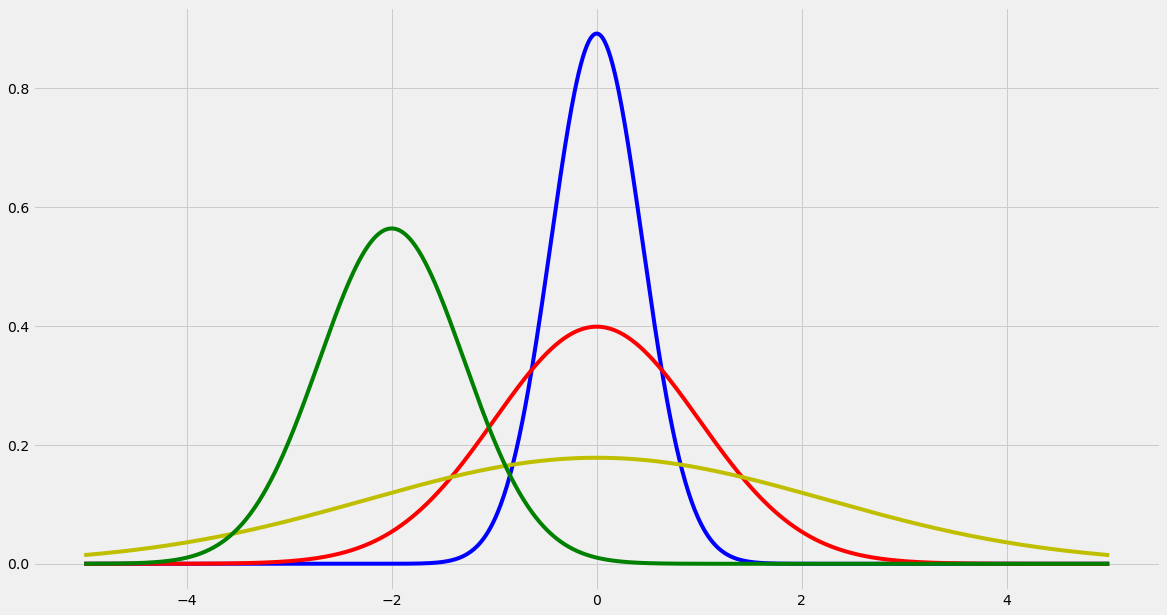

In [11]:
# Create a plot.
fig, ax = plt.subplots()

# Create some x values.
x = np.linspace(-5.0, 5.0, 1000)

# Calculate our y values from x with mu=0.0 and sigma=sqrt(0.2).
y = normalpdf(x, 0.0, np.sqrt(0.2))
# Plot the values.
ax.plot(x, y, 'b-')

# Calculate our y values from x with mu=0.0 and sigma=1.0.
y = normalpdf(x)
# Plot the values.
ax.plot(x, y, 'r-')

# Calculate our y values from x with mu=0.0 and sigma=sqrt(5.0).
y = normalpdf(x, sigma=np.sqrt(5.0))
# Plot the values.
ax.plot(x, y, 'y-')

# Calculate our y values from x with mu=-2.0 and sigma=sqrt(0.5).
y = normalpdf(x, -2.0, np.sqrt(0.5))
# Plot the values.
ax.plot(x, y, 'g-')

<br> 

## Fill between

***

Text(0, 0.2, '~95%')

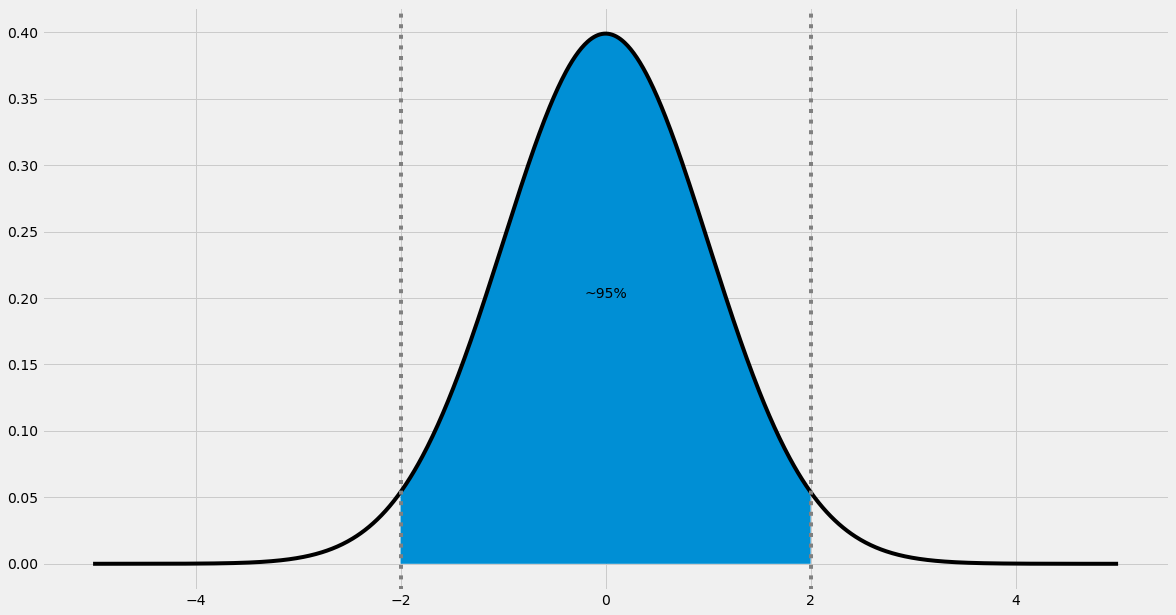

In [12]:
# Create some x values.
x = np.linspace(-5.0, 5.0, 1000)

# Calculate our y values from x.
y = normalpdf(x)

# Create a plot.
fig, ax = plt.subplots()

# Plot the values.
ax.plot(x, y, 'k-')

# Limit x values to -2.0 and 2.0
x = np.linspace(-2.0, 2.0, 1000)

# Calculate the pdf values.
y = normalpdf(x)

# Fill between x axis and y - for x values between -2.0 and 2.0.
ax.fill_between(x, 0, y)

# Draw a couple of vertical lines.
ax.axvline(-2.0, color='grey', linestyle=':')
ax.axvline(2.0, color='grey', linestyle=':')

# Draw some text.
ax.text(0, 0.2, '~95%', horizontalalignment='center')

In [13]:
# Probability of value less than 2.0.
stats.norm().cdf(2.0)

0.9772498680518208

In [14]:
# Probability of value less than -2.0.
stats.norm().cdf(-2.0)

0.022750131948179195

In [15]:
# Probability of seeing value between -2.0 and 2.0.
stats.norm().cdf(2.0) - stats.norm().cdf(-2.0)

0.9544997361036416

In [16]:
# Probability of seeing value between -3.0 and 3.0.
stats.norm().cdf(3.0) - stats.norm().cdf(-3.0)

0.9973002039367398

<br>

## Lots of small PDFs

***

In [22]:
# Load iris.
df = pd.read_csv('https://github.com/ianmcloughlin/datasets/raw/main/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
# Extract sepal lengths.
vals = df['sepal_length'].to_numpy()[:150]

In [32]:
# Just use the first 10
vals = vals[:10]
vals

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

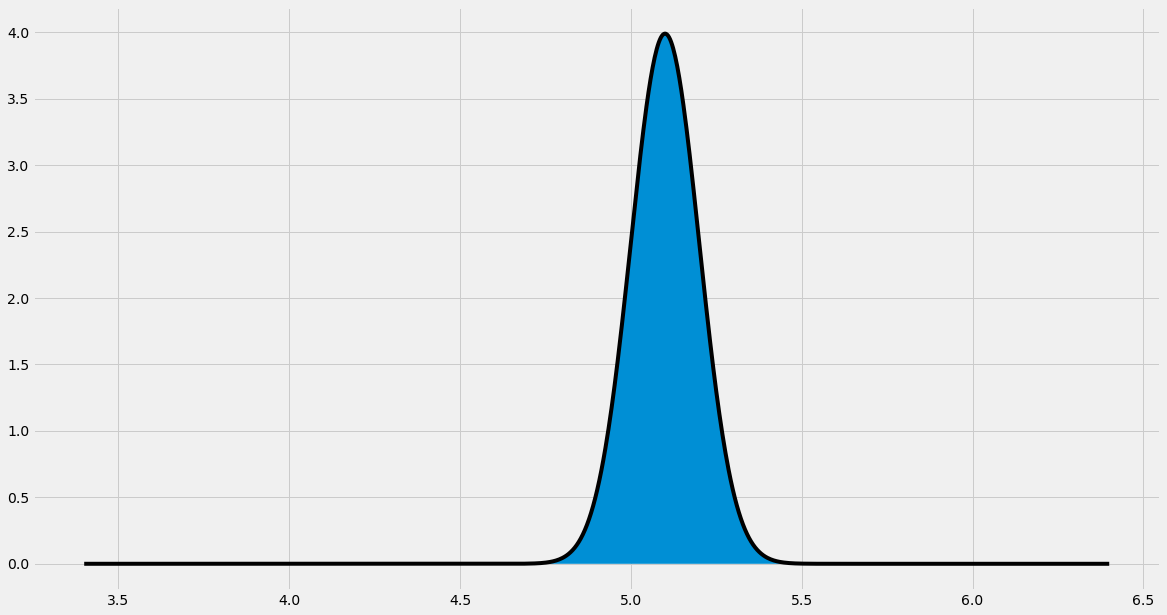

In [33]:
# Minimum and maximum values.
low, high = vals.min(), vals.max()

# Create some space on the x axis.
diff = high - low
low = low - diff
high = high + diff

# Create some x values.
x = np.linspace(low, high, 1000)

# Create a plot.
fig, ax = plt.subplots()

# Select a value from the data
i = vals[0]

# Calculate our y values from x
y = normalpdf(x, mu=i, sigma=0.1)

# Plot the values.
ax.plot(x, y, 'k-')

# Fill between x axis and y
ax.fill_between(x, 0, y)

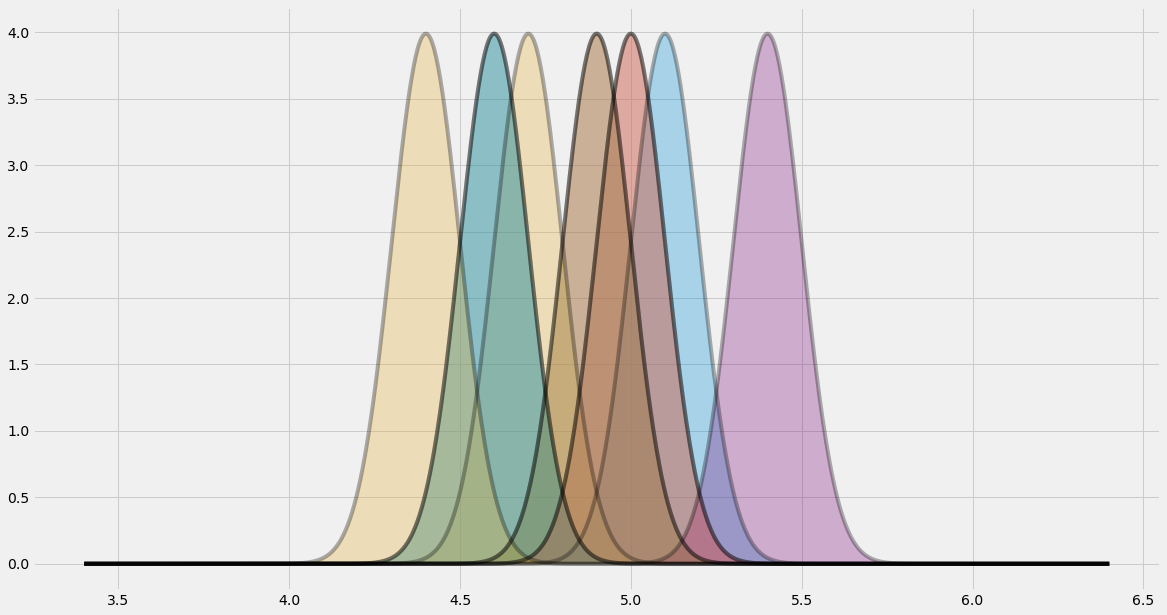

In [35]:
# Minimum and maximum values.
low, high = vals.min(), vals.max()

# Create some space on the x axis.
diff = high - low
low = low - diff
high = high + diff

# Create some x values.
x = np.linspace(low, high, 1000)

# Create a plot.
fig, ax = plt.subplots()

# Select a value from the data
for i in vals:
    # Calculate our y values from x
    y = normalpdf(x, mu=i, sigma=0.1)

    # Plot the values.
    ax.plot(x, y, 'k-', alpha=0.3)

    # Fill between x axis and y
    ax.fill_between(x, 0, y, alpha=0.3)

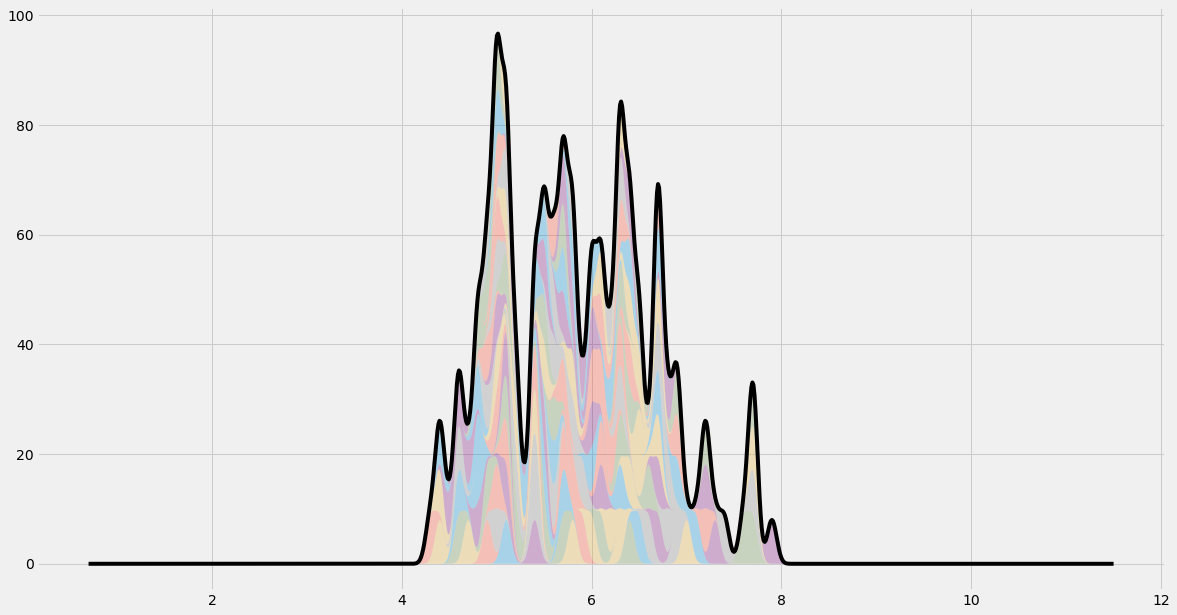

In [43]:
# Extract sepal lengths.
vals = df['sepal_length'].to_numpy()[:150]

# Minimum and maximum values.
low, high = vals.min(), vals.max()

# Create some space on the x axis.
diff = high - low
low = low - diff
high = high + diff

# Create some x values.
x = np.linspace(low, high, 1000)

# Create a plot.
fig, ax = plt.subplots()

# Set the initial previous y values to 0.
prev = 0 * x

# Select a value from the data.
for i in vals:
    # Calculate our y values from x.
    y = normalpdf(x, mu=i, sigma=0.05)
    # Add the previous sums of the y values.
    y = y + prev

    # Fill between x axis and y.
    ax.fill_between(x, prev, y, alpha=0.3)
    
    # Update the prev array.
    prev = y
    
# Plot the values.
ax.plot(x, y, 'k-')

<br>

## Using Pandas  

***

<AxesSubplot:ylabel='Density'>

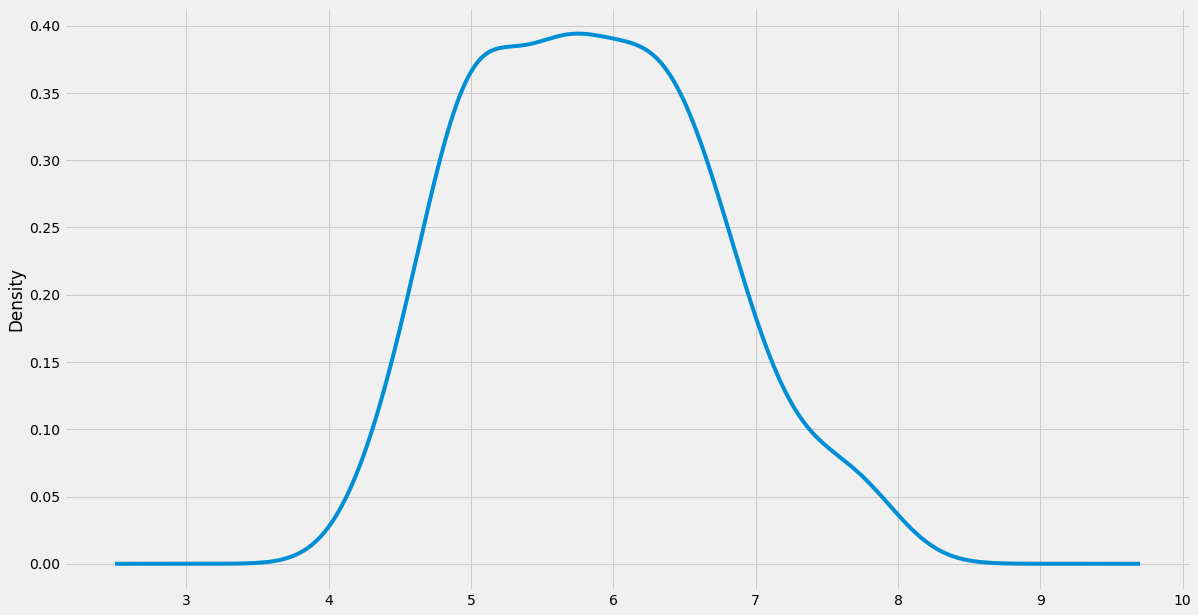

In [41]:
df['sepal_length'].plot.kde()

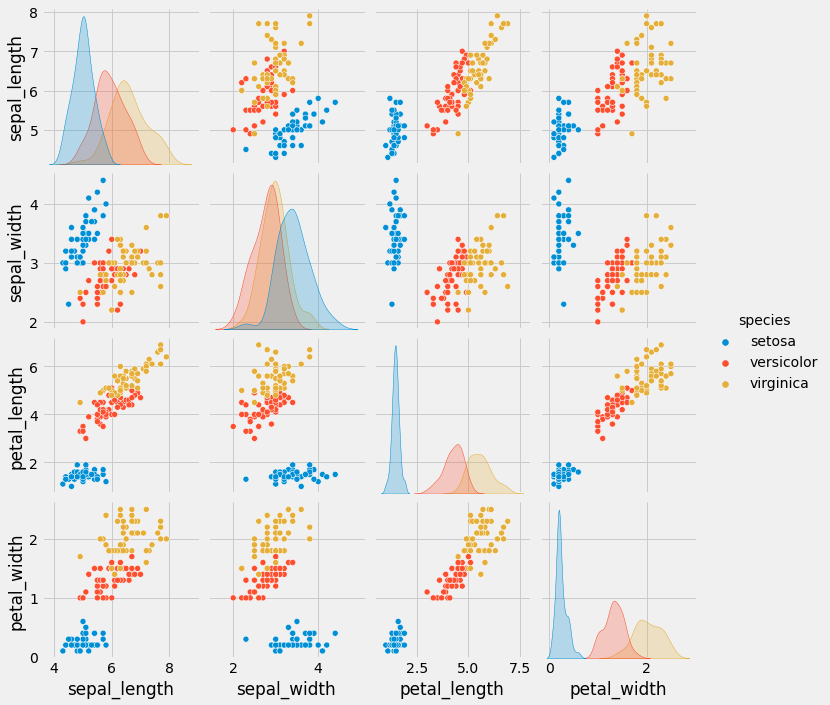

In [42]:
sns.pairplot(data=df, hue='species')